# FuseMap Tutorial III: Gene Spatial Imputation

This tutorial demonstrates how to perform spatial imputation of unmeasured genes after integrating datasets using FuseMap. We'll use a pre-trained FuseMap gene embedding model to impute the expression of ABCC9 gene on MERFISH data.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# add more genes

In [2]:
import os
import scanpy as sc
import numpy as np
import scipy
from scipy import stats

### 1. Load the pre-trained gene embeddings and cell embeddings

In [3]:
# Define the gene we want to impute and the dataset
target_gene = 'ABCC9'
dataset = 'merfish'

# Set paths to pre-trained model outputs
save_dir = f"/n/netscratch/nali_lab_seas/Everyone/mingze/FuseMap_imputation/imputed_result/rerun_version3_impt_{dataset}_{target_gene}/"
# Load pre-trained gene embeddings and transfer cell type annotations
celltype_all = sc.read_h5ad(os.path.join(save_dir, "transfer_celltype.h5ad"))
gene_embed = sc.read_h5ad(os.path.join(save_dir, "ad_gene_embedding.h5ad"))

### 2. Gene imputation
Based on FuseMap's mechanism, we can simply get spatial gene imputation by multiplying cell type embeddings with gene embeddings

In [4]:
# Get cell type annotations for our dataset
celltype_data = celltype_all[celltype_all.obs['name']==dataset]

# Project spatial data into gene embedding space
spatial_gene_proj = celltype_data.X @ gene_embed.X.T
print(celltype_data.shape, gene_embed.shape, spatial_gene_proj.shape)

(44959, 64) (1998, 64) (44959, 1998)


### 3. Evaluate spatial gene imputation

In [5]:
# Load and preprocess spatial data
spatial_data = sc.read_h5ad(f'/n/home11/mingzeyuan/FuseMap/data/02_imaging_sequencing_data/raw_data/{dataset}.h5ad')
sc.pp.normalize_total(spatial_data)
sc.pp.log1p(spatial_data)
sc.pp.scale(spatial_data, zero_center=False, max_value=10)

# Extract measured and imputed expression for target gene
measured_expr = spatial_data.X[:,np.where(spatial_data.var.index==target_gene)[0][0]]
imputed_expr = spatial_gene_proj[:,np.where(gene_embed.obs.index==target_gene)[0][0]]

# Convert sparse matrices to dense if needed
if scipy.sparse.isspmatrix(measured_expr):
    measured_expr = measured_expr.toarray().flatten()
if scipy.sparse.isspmatrix(imputed_expr):
    imputed_expr = imputed_expr.toarray().flatten()

# Calculate correlation between measured and imputed expression
correlation = stats.pearsonr(measured_expr, imputed_expr)[0]
print(f"Correlation between measured and imputed {target_gene}: {correlation:.3f}")

Correlation between measured and imputed ABCC9: 0.616


### 4. Visualization

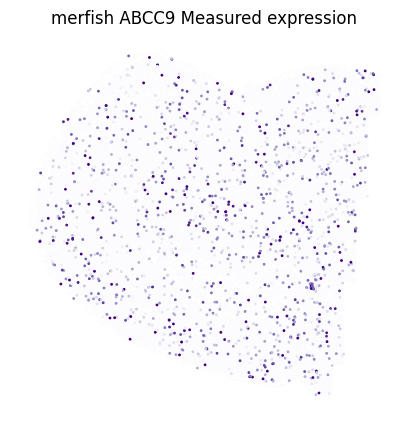

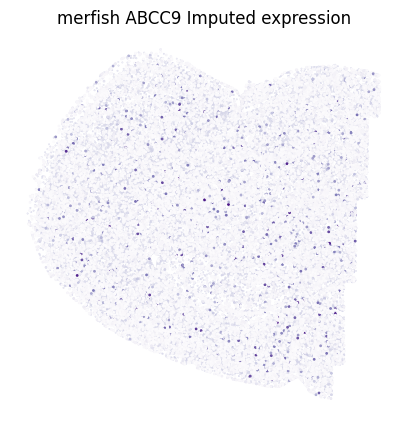

In [6]:
import matplotlib.pyplot as plt
x = spatial_data.obs['x']
y = spatial_data.obs['y']
coff=(max(x)-min(x))/(max(y)-min(y))
normalized_data_raw = measured_expr
normalized_data = imputed_expr

plt.figure(figsize=(5,5/coff))
plt.scatter(x, y, s=0.1, c=normalized_data_raw, cmap='Purples')
plt.scatter(x[[normalized_data_raw>0][0].flatten()], y[[normalized_data_raw>0][0].flatten()], s=1, c=normalized_data_raw[[normalized_data_raw>0][0].flatten()], cmap='Purples')
plt.axis('off')
plt.gca().invert_yaxis()
plt.title(f'{dataset} {target_gene} Measured expression')
plt.show()
plt.close()

plt.figure(figsize=(5,5/coff))
plt.scatter(x, y, s=0.1, c=normalized_data, cmap='Purples')
plt.scatter(x[[normalized_data>0][0].flatten()], y[[normalized_data>0][0].flatten()], s=1, c=normalized_data[[normalized_data>0][0].flatten()], cmap='Purples')
plt.axis('off')
plt.gca().invert_yaxis()
plt.title(f'{dataset} {target_gene} Imputed expression')
plt.show()
plt.close()

Other random example: CLDN5 in merscope

(119927, 64) (1998, 64) (119927, 1998)
Correlation between measured and imputed CLDN5: 0.868


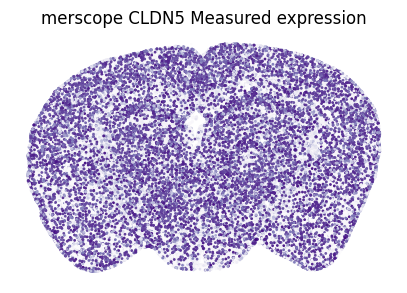

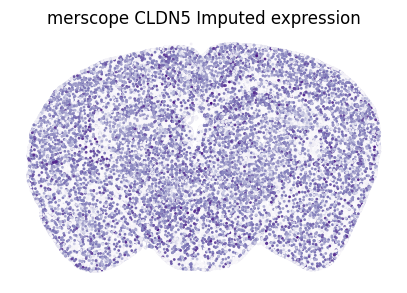

In [7]:
# Define the gene we want to impute and the dataset
target_gene = 'CLDN5'
dataset = 'merscope'

# Set paths to pre-trained model outputs
save_dir = f"/n/netscratch/nali_lab_seas/Everyone/mingze/FuseMap_imputation/imputed_result/rerun_version3_impt_{dataset}_{target_gene}/"
# Load pre-trained gene embeddings and transfer cell type annotations
celltype_all = sc.read_h5ad(os.path.join(save_dir, "transfer_celltype.h5ad"))
gene_embed = sc.read_h5ad(os.path.join(save_dir, "ad_gene_embedding.h5ad"))

# Get cell type annotations for our dataset
celltype_data = celltype_all[celltype_all.obs['name']==dataset]

# Project spatial data into gene embedding space
spatial_gene_proj = celltype_data.X @ gene_embed.X.T
print(celltype_data.shape, gene_embed.shape, spatial_gene_proj.shape)

# Load and preprocess spatial data
spatial_data = sc.read_h5ad(f'/n/home11/mingzeyuan/FuseMap/data/02_imaging_sequencing_data/raw_data/{dataset}.h5ad')
sc.pp.normalize_total(spatial_data)
sc.pp.log1p(spatial_data)
sc.pp.scale(spatial_data, zero_center=False, max_value=10)

# Extract measured and imputed expression for target gene
measured_expr = spatial_data.X[:,np.where(spatial_data.var.index==target_gene)[0][0]]
imputed_expr = spatial_gene_proj[:,np.where(gene_embed.obs.index==target_gene)[0][0]]

# Convert sparse matrices to dense if needed
if scipy.sparse.isspmatrix(measured_expr):
    measured_expr = measured_expr.toarray().flatten()
if scipy.sparse.isspmatrix(imputed_expr):
    imputed_expr = imputed_expr.toarray().flatten()

# Calculate correlation between measured and imputed expression
correlation = stats.pearsonr(measured_expr, imputed_expr)[0]
print(f"Correlation between measured and imputed {target_gene}: {correlation:.3f}")

import matplotlib.pyplot as plt
x = spatial_data.obs['x']
y = spatial_data.obs['y']
coff=(max(x)-min(x))/(max(y)-min(y))
normalized_data_raw = measured_expr
normalized_data = imputed_expr

plt.figure(figsize=(5,5/coff))
plt.scatter(x, y, s=0.1, c=normalized_data_raw, cmap='Purples')
plt.scatter(x[[normalized_data_raw>0][0].flatten()], y[[normalized_data_raw>0][0].flatten()], s=1, c=normalized_data_raw[[normalized_data_raw>0][0].flatten()], cmap='Purples')
plt.axis('off')
plt.gca().invert_yaxis()
plt.title(f'{dataset} {target_gene} Measured expression')
plt.show()
plt.close()

plt.figure(figsize=(5,5/coff))
plt.scatter(x, y, s=0.1, c=normalized_data, cmap='Purples')
plt.scatter(x[[normalized_data>0][0].flatten()], y[[normalized_data>0][0].flatten()], s=1, c=normalized_data[[normalized_data>0][0].flatten()], cmap='Purples')
plt.axis('off')
plt.gca().invert_yaxis()
plt.title(f'{dataset} {target_gene} Imputed expression')
plt.show()
plt.close()